**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [18]:
from __future__ import print_function, division
import pylab as pl

import os
import json
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

os.environ['PUIDATA']='/nfshome/em3845/PUIData'
s = json.load( open(os.getenv('PUIDATA')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  mplDeprecation)


In [5]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    

# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

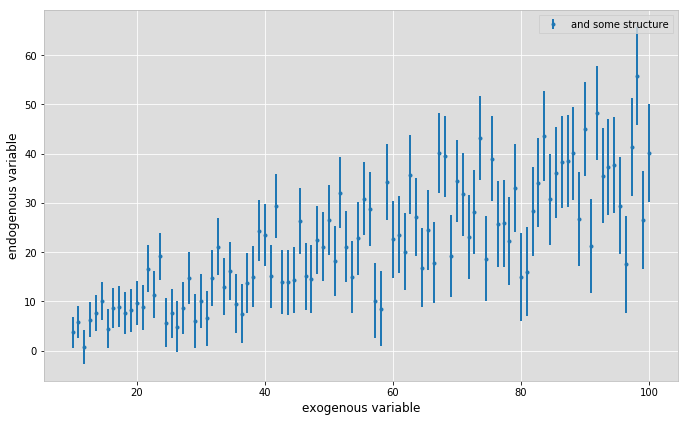

In [58]:
slope = 0.4
x = np.linspace(10,100,100)
y = line(slope,x,0,errors)
fig = pl.figure(figsize=(25,15))
ax = fig.add_subplot(222)
ax.errorbar(x, y, yerr=errors(x), fmt='.', label = "and some structure")
ax.set_xlabel('exogenous variable')
ax.set_ylabel('endogenous variable')
ax.legend()

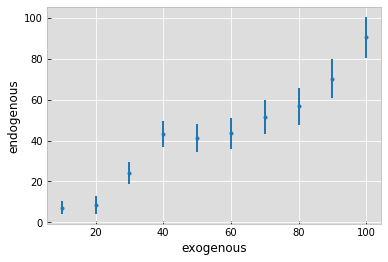

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [59]:
x_con = sm.add_constant(x)
pd.DataFrame([x,y,x_con], index=['x','y','x constant'])

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
x,10,10.9091,11.8182,12.7273,13.6364,14.5455,15.4545,16.3636,17.2727,18.1818,...,91.8182,92.7273,93.6364,94.5455,95.4545,96.3636,97.2727,98.1818,99.0909,100
y,3.72878,5.82638,0.764376,6.33737,7.61532,10.0884,4.46683,8.72008,8.93035,7.73212,...,48.2937,35.5363,37.2987,37.7271,29.4615,17.5607,41.3651,55.7832,26.5684,40.1396
x constant,"[1.0, 10.0]","[1.0, 10.9090909091]","[1.0, 11.8181818182]","[1.0, 12.7272727273]","[1.0, 13.6363636364]","[1.0, 14.5454545455]","[1.0, 15.4545454545]","[1.0, 16.3636363636]","[1.0, 17.2727272727]","[1.0, 18.1818181818]",...,"[1.0, 91.8181818182]","[1.0, 92.7272727273]","[1.0, 93.6363636364]","[1.0, 94.5454545455]","[1.0, 95.4545454545]","[1.0, 96.3636363636]","[1.0, 97.2727272727]","[1.0, 98.1818181818]","[1.0, 99.0909090909]","[1.0, 100.0]"


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [60]:
#THE WRONG WAY
smfit1 = smf.OLS(y, x).fit()
smfit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1072.
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           6.39e-55
Time:                        22:13:51   Log-Likelihood:                -340.26
No. Observations:                 100   AIC:                             682.5
Df Residuals:                      99   BIC:                             685.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.3926      0.012     32.747      0.000         0.369     0.416
==============================================================================
Omnibus:                        1.036   Durbin-Watson:                   2.205
Prob(Omnibus):                  0.596   Jarque-Bera (JB):                0.715
Skew:                          -0.201   Prob(JB):                        0.699
Kurtosis:                       3.101   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
#THE RIGHT WAY
smfit = smf.OLS(y, x_con).fit()
smfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     173.4
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           2.11e-23
Time:                        22:13:53   Log-Likelihood:                -339.71
No. Observations:                 100   AIC:                             683.4
Df Residuals:                      98   BIC:                             688.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.7649      1.696      1.041      0.301        -1.600     5.130
x1             0.3665      0.028     13.168      0.000         0.311     0.422
==============================================================================
Omnibus:                        0.151   Durbin-Watson:                   2.230
Prob(Omnibus):                  0.927   Jarque-Bera (JB):                0.028
Skew:                          -0.040   Prob(JB):                        0.986
Kurtosis:                       3.012   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. plot the data (as points) and both statsmodels fits

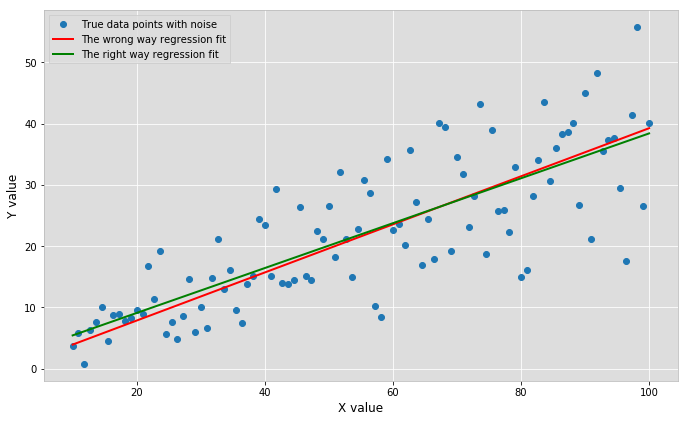

In [63]:
fig = pl.figure(figsize=(25,15))
ax = fig.add_subplot(221)
ax.plot(x,y, 'o', label="True data points with noise")
ax.plot(x, smfit1.predict(x),'r', label='The wrong way regression fit')
ax.plot(x, smfit.predict(x_con),'g',label='The right way regression fit')
ax.set_ylabel('Y value')
ax.set_xlabel('X value')
ax.legend()

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

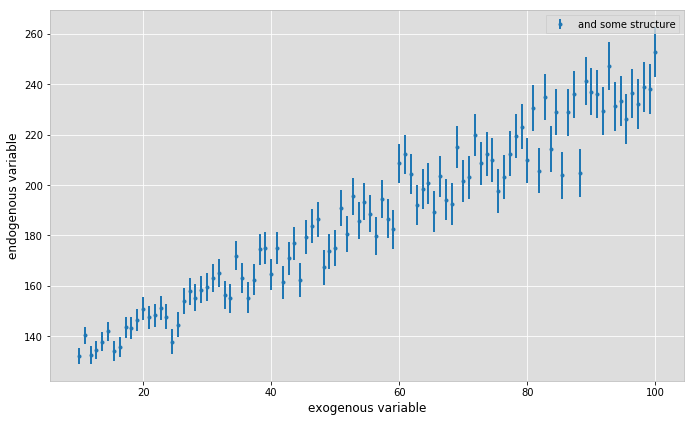

In [68]:
slope = 1.2
x = np.linspace(10,100,100)
b = 100*slope
y = line(slope,x,b,errors)
fig = pl.figure(figsize=(25,15))
ax = fig.add_subplot(222)
ax.errorbar(x, y, yerr=errors(x), fmt='.', label = "and some structure")
ax.set_xlabel('exogenous variable')
ax.set_ylabel('endogenous variable')
ax.legend()

# 6. repeat step 3

In [69]:
#THE RIGHT WAY
smfit = smf.OLS(y, x_con).fit()
print(smfit.summary())
#THE WRONG WAY
smfit1 = smf.OLS(y, x).fit()
print(smfit1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     1627.
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           7.76e-63
Time:                        22:19:55   Log-Likelihood:                -346.72
No. Observations:                 100   AIC:                             697.4
Df Residuals:                      98   BIC:                             702.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        121.1085      1.819     66.581      0.0

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [76]:
# I decided to use the errors function and multiply it by constant to increase the magnitude
weights = errors(x)*10
rm = sm.WLS(y, x_con,weights)
reg = rm.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.930
Model:                            WLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1305.
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.96e-58
Time:                        22:28:10   Log-Likelihood:                -354.55
No. Observations:                 100   AIC:                             713.1
Df Residuals:                      98   BIC:                             718.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        121.1157      2.224     54.455      0.000       116.702   125.529
x1             1.2037      0.033     36.119      0.000         1.138     1.270
==============================================================================
Omnibus:                        2.500   Durbin-Watson:                   2.386
Prob(Omnibus):                  0.287   Jarque-Bera (JB):                1.879
Skew:                          -0.256   Prob(JB):                        0.391
Kurtosis:                       3.435   Cond. No.                         179.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

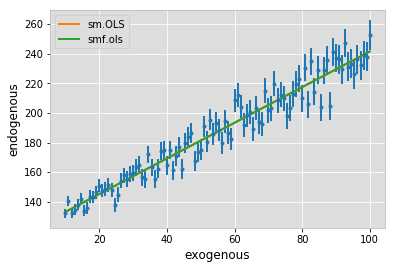

In [78]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
smfitDoneRight = smf.ols('y ~ x + const', data={'x':x_con, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfitDoneRight.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();